## 데이터 업로드

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')        # 실행 → 인증 URL 클릭 → 코드 복사해서 입력


Mounted at /content/drive


In [ ]:
from google.colab import files, drive
import shutil, pathlib

uploaded = files.upload() # CSV 선택
drive.mount('/content/drive/') # 인증
src = next(iter(uploaded)) # 업로드한 첫 파일 이름
dst = pathlib.Path('/content/drive/MyDrive/projects/DHS283') / src
dst.parent.mkdir(parents=True, exist_ok=True)
shutil.move(src, dst) # Drive 폴더로 이동
print('Drive에 저장됨:', dst)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


StopIteration: 

## 데이터 전처리

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/projects/DHS283/전국단위여론조사정당지지도(2023.10~2025.06.csv')

In [ ]:
df.head()

,등록번호,조사기관,의뢰자,조사일자,조사방법,표본추출틀,표본수(명),접촉률(%),응답률(%),95%신뢰수준\n표본오차(%p),...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,새로운미래,개혁신당,자유통일당,조국혁신당,진보당,기타정당,지지정당\n없음,모름/\n무응답,NaN,NaN
1,11704.0,미디어리서치,뉴스핌,23.10.30.~31.,무선ARS(100),무선RDD,1000.0,21.2,3.0,±3.1,...,-,-,-,-,-,4.9,14.6,1.0,NaN,NaN
2,11705.0,PNR-피플네트웍스,뉴데일리,23.10.30.~31.,무선ARS(100),무선RDD,1066.0,27.4,3.3,±3.0,...,-,-,-,-,-,4.0,7.7,1.4,NaN,NaN
3,11706.0,여론조사공정,데일리안,23.10.30.~31.,무선ARS(100),무선RDD,1001.0,22.2,2.9,±3.1,...,-,-,-,-,-,4.0,12.9,0.6,NaN,NaN
4,11707.0,리서치뷰,리서치뷰 자체조사,23.10.30.~31.,무선ARS(100),무선RDD,1000.0,46.0,2.8,±3.1,...,-,-,-,-,-,4.0,9.0,2.0,NaN,NaN


In [ ]:
df.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   등록번호              971 non-null    float64
 1   조사기관              971 non-null    object 
 2   의뢰자               971 non-null    object 
 3   조사일자              971 non-null    object 
 4   조사방법              971 non-null    object 
 5   표본추출틀             971 non-null    object 
 6   표본수(명)            971 non-null    float64
 7   접촉률(%)            971 non-null    float64
 8   응답률(%)            971 non-null    float64
 9   95%신뢰수준
표본오차(%p)  971 non-null    object 
 10  정당지지율(%)          972 non-null    object 
 11  Unnamed: 11       972 non-null    object 
 12  Unnamed: 12       248 non-null    object 
 13  Unnamed: 13       278 non-null    object 
 14  Unnamed: 14       972 non-null    object 
 15  Unnamed: 15       216 non-null    object 
 16  Unnamed: 16       963 non-null    object 
 1

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/projects/DHS283/전국단위여론조사정당지지도(2023.10~2025.06.csv', header=[0, 1])

df2.columns = (df2.columns.to_frame()               # level_0, level_1 → DataFrame
                       .replace('^Unnamed.*', pd.NA, regex=True)
                       .ffill()
                       .fillna('')                # 아직 비어 있으면 ''
                       .agg(lambda x: x[0] if x[1]=='' else f'{x[0]}_{x[1]}',
                            axis=1))

# (필요하면) 첫 데이터 행이 NaN만 들어 있으면 제거
df2 = df2.loc[~df2.isna().all(axis=1)]

df2.head()

,등록번호,조사기관,의뢰자,조사일자,조사방법,표본추출틀,표본수(명),접촉률(%),응답률(%),95%신뢰수준\n표본오차(%p),...,정당지지율(%)_새로운미래,정당지지율(%)_개혁신당,정당지지율(%)_자유통일당,정당지지율(%)_조국혁신당,정당지지율(%)_진보당,정당지지율(%)_기타정당,정당지지율(%)_지지정당\n없음,정당지지율(%)_모름/\n무응답,정당지지율(%)_모름/\n무응답,정당지지율(%)_모름/\n무응답
0,11704,미디어리서치,뉴스핌,23.10.30.~31.,무선ARS(100),무선RDD,1000,21.2,3.0,±3.1,...,-,-,-,-,-,4.9,14.6,1.0,NaN,NaN
1,11705,PNR-피플네트웍스,뉴데일리,23.10.30.~31.,무선ARS(100),무선RDD,1066,27.4,3.3,±3.0,...,-,-,-,-,-,4.0,7.7,1.4,NaN,NaN
2,11706,여론조사공정,데일리안,23.10.30.~31.,무선ARS(100),무선RDD,1001,22.2,2.9,±3.1,...,-,-,-,-,-,4.0,12.9,0.6,NaN,NaN
3,11707,리서치뷰,리서치뷰 자체조사,23.10.30.~31.,무선ARS(100),무선RDD,1000,46.0,2.8,±3.1,...,-,-,-,-,-,4.0,9.0,2.0,NaN,NaN
4,11710,한국갤럽조사연구소,한국갤럽 자체조사,23.10.31.~11.02.,무선전화면접(100),가상번호,1000,39.5,13.8,±3.1,...,-,-,-,-,-,1.0,24.0,2.0,NaN,NaN


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 971 entries, 0 to 970
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   등록번호              971 non-null    int64  
 1   조사기관              971 non-null    object 
 2   의뢰자               971 non-null    object 
 3   조사일자              971 non-null    object 
 4   조사방법              971 non-null    object 
 5   표본추출틀             971 non-null    object 
 6   표본수(명)            971 non-null    int64  
 7   접촉률(%)            971 non-null    float64
 8   응답률(%)            971 non-null    float64
 9   95%신뢰수준
표본오차(%p)  971 non-null    object 
 10  정당지지율(%)_더불어민주당   971 non-null    float64
 11  정당지지율(%)_국민의힘     971 non-null    float64
 12  정당지지율(%)_정의당      247 non-null    float64
 13  정당지지율(%)_새로운미래    277 non-null    object 
 14  정당지지율(%)_개혁신당     971 non-null    object 
 15  정당지지율(%)_자유통일당    215 non-null    object 
 16  정당지지율(%)_조국혁신당    962 non-null    object 
 17  정당

In [ ]:
df2 = (df2
       .replace({'-': None, '': None})
       .fillna(0.0))

df2

,등록번호,조사기관,의뢰자,조사일자,조사방법,표본추출틀,표본수(명),접촉률(%),응답률(%),95%신뢰수준\n표본오차(%p),...,정당지지율(%)_새로운미래,정당지지율(%)_개혁신당,정당지지율(%)_자유통일당,정당지지율(%)_조국혁신당,정당지지율(%)_진보당,정당지지율(%)_기타정당,정당지지율(%)_지지정당\n없음,정당지지율(%)_모름/\n무응답,정당지지율(%)_모름/\n무응답,정당지지율(%)_모름/\n무응답
0,11704,미디어리서치,뉴스핌,23.10.30.~31.,무선ARS(100),무선RDD,1000,21.2,3.0,±3.1,...,0.0,0.0,0.0,0.0,0.0,4.9,14.6,1.0,0.0,0.0
1,11705,PNR-피플네트웍스,뉴데일리,23.10.30.~31.,무선ARS(100),무선RDD,1066,27.4,3.3,±3.0,...,0.0,0.0,0.0,0.0,0.0,4.0,7.7,1.4,0.0,0.0
2,11706,여론조사공정,데일리안,23.10.30.~31.,무선ARS(100),무선RDD,1001,22.2,2.9,±3.1,...,0.0,0.0,0.0,0.0,0.0,4.0,12.9,0.6,0.0,0.0
3,11707,리서치뷰,리서치뷰 자체조사,23.10.30.~31.,무선ARS(100),무선RDD,1000,46.0,2.8,±3.1,...,0.0,0.0,0.0,0.0,0.0,4.0,9.0,2.0,0.0,0.0
4,11710,한국갤럽조사연구소,한국갤럽 자체조사,23.10.31.~11.02.,무선전화면접(100),가상번호,1000,39.5,13.8,±3.1,...,0.0,0.0,0.0,0.0,0.0,1.0,24.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,14393,메타보이스,JTBC,25.05.26.~27,무선전화면접(100),가상번호,1005,27.5,14.2,±3.1,...,0.0,7,0.0,2,0,1.0,8.0,1.0,0.0,0.0
967,14394,리서치민,뉴데일리,25.05.25.~27.,무선ARS(100),무선RDD,6001,20.7,7.3,±1.3,...,0.0,6.6,0.0,1.5,0.4,1.5,4.5,0.8,0.0,0.0
968,14395,입소스 주식회사,SBS,25.05.25.~27.,무선전화면접(100),가상번호,1003,29.2,18.1,±3.1,...,0.0,7,0.0,6,1,2.0,10.0,1.0,0.0,0.0
969,14396,윈지코리아컨설팅,서울의소리,25.05.27.,무선ARS(100),무선RDD,1002,25.8,5.2,±3.1,...,0.0,7.9,0.0,2.7,1.3,2.9,2.1,0.2,0.0,0.0


In [ ]:
df2['연월']=df2['조사일자'].str.slice(0,8)
df2['연월']=pd.to_datetime(df2['연월'], format='%y.%m.%d')
df2

,등록번호,조사기관,의뢰자,조사일자,조사방법,표본추출틀,표본수(명),접촉률(%),응답률(%),95%신뢰수준\n표본오차(%p),...,정당지지율(%)_개혁신당,정당지지율(%)_자유통일당,정당지지율(%)_조국혁신당,정당지지율(%)_진보당,정당지지율(%)_기타정당,정당지지율(%)_지지정당\n없음,정당지지율(%)_모름/\n무응답,정당지지율(%)_모름/\n무응답,정당지지율(%)_모름/\n무응답,연월
0,11704,미디어리서치,뉴스핌,23.10.30.~31.,무선ARS(100),무선RDD,1000,21.2,3.0,±3.1,...,0.0,0.0,0.0,0.0,4.9,14.6,1.0,0.0,0.0,2023-10-30
1,11705,PNR-피플네트웍스,뉴데일리,23.10.30.~31.,무선ARS(100),무선RDD,1066,27.4,3.3,±3.0,...,0.0,0.0,0.0,0.0,4.0,7.7,1.4,0.0,0.0,2023-10-30
2,11706,여론조사공정,데일리안,23.10.30.~31.,무선ARS(100),무선RDD,1001,22.2,2.9,±3.1,...,0.0,0.0,0.0,0.0,4.0,12.9,0.6,0.0,0.0,2023-10-30
3,11707,리서치뷰,리서치뷰 자체조사,23.10.30.~31.,무선ARS(100),무선RDD,1000,46.0,2.8,±3.1,...,0.0,0.0,0.0,0.0,4.0,9.0,2.0,0.0,0.0,2023-10-30
4,11710,한국갤럽조사연구소,한국갤럽 자체조사,23.10.31.~11.02.,무선전화면접(100),가상번호,1000,39.5,13.8,±3.1,...,0.0,0.0,0.0,0.0,1.0,24.0,2.0,0.0,0.0,2023-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,14393,메타보이스,JTBC,25.05.26.~27,무선전화면접(100),가상번호,1005,27.5,14.2,±3.1,...,7,0.0,2,0,1.0,8.0,1.0,0.0,0.0,2025-05-26
967,14394,리서치민,뉴데일리,25.05.25.~27.,무선ARS(100),무선RDD,6001,20.7,7.3,±1.3,...,6.6,0.0,1.5,0.4,1.5,4.5,0.8,0.0,0.0,2025-05-25
968,14395,입소스 주식회사,SBS,25.05.25.~27.,무선전화면접(100),가상번호,1003,29.2,18.1,±3.1,...,7,0.0,6,1,2.0,10.0,1.0,0.0,0.0,2025-05-25
969,14396,윈지코리아컨설팅,서울의소리,25.05.27.,무선ARS(100),무선RDD,1002,25.8,5.2,±3.1,...,7.9,0.0,2.7,1.3,2.9,2.1,0.2,0.0,0.0,2025-05-27


In [ ]:
# '조사기관' 열에 '한국갤럽자체조사'라는 문자열이 포함된 행만 추출
mask = df2['의뢰자'].str.contains('한국갤럽 자체조사', na=True)
print(df2['의뢰자'])
df_gallup = df2.loc[mask].copy()    # .copy() → 독립 데이터프레임

# 인덱스를 새로 매길 때
df_gallup.reset_index(drop=True, inplace=True)
df_gallup

0            뉴스핌
1           뉴데일리
2           데일리안
3      리서치뷰 자체조사
4      한국갤럽 자체조사
         ...    
966         JTBC
967         뉴데일리
968          SBS
969        서울의소리
970        뉴스토마토
Name: 의뢰자, Length: 971, dtype: object


,등록번호,조사기관,의뢰자,조사일자,조사방법,표본추출틀,표본수(명),접촉률(%),응답률(%),95%신뢰수준\n표본오차(%p),...,정당지지율(%)_개혁신당,정당지지율(%)_자유통일당,정당지지율(%)_조국혁신당,정당지지율(%)_진보당,정당지지율(%)_기타정당,정당지지율(%)_지지정당\n없음,정당지지율(%)_모름/\n무응답,정당지지율(%)_모름/\n무응답,정당지지율(%)_모름/\n무응답,연월
0,11710,한국갤럽조사연구소,한국갤럽 자체조사,23.10.31.~11.02.,무선전화면접(100),가상번호,1000,39.5,13.8,±3.1,...,0.0,0.0,0.0,0.0,1.0,24.0,2.0,0.0,0.0,2023-10-31
1,11727,한국갤럽조사연구소,한국갤럽 자체조사,23.11.07.~09.,무선전화면접(100),가상번호,1001,38.2,14.0,±3.1,...,0.0,0.0,0.0,0.0,2.0,23.0,2.0,0.0,0.0,2023-11-07
2,11749,한국갤럽조사연구소,한국갤럽 자체조사,23.11.14.~16.,무선전화면접(100),가상번호,1001,39.6,13.6,±3.1,...,0.0,0.0,0.0,0.0,2.0,23.0,3.0,0.0,0.0,2023-11-14
3,11768,한국갤럽조사연구소,한국갤럽 자체조사,23.11.21.~23.,무선전화면접(100),가상번호,1001,39.4,13.4,±3.1,...,0.0,0.0,0.0,0.0,2.0,24.0,3.0,0.0,0.0,2023-11-21
4,11794,한국갤럽조사연구소,한국갤럽 자체조사,23.11.28.~30.,무선전화면접(100),가상번호,1009,42.8,12.4,±3.1,...,0.0,0.0,0.0,0.0,1.0,26.0,2.0,0.0,0.0,2023-11-28
5,11819,한국갤럽조사연구소,한국갤럽 자체조사,23.12.05.~07.,무선전화면접(100),가상번호,1000,41.0,13.1,±3.1,...,0.0,0.0,0.0,0.0,0.0,24.0,3.0,0.0,0.0,2023-12-05
6,11879,한국갤럽조사연구소,한국갤럽 자체조사,23.12.12.~14.,무선전화면접(100),가상번호,1002,40.9,13.2,±3.1,...,0.0,0.0,0.0,0.0,2.0,22.0,2.0,0.0,0.0,2023-12-12
7,12101,한국갤럽조사연구소,한국갤럽 자체조사,24.01.09.~11.,무선전화면접(100),가상번호,1002,37.2,14.3,±3.1,...,0.0,0.0,0.0,0.0,3.0,21.0,4.0,0.0,0.0,2024-01-09
8,12138,한국갤럽조사연구소,한국갤럽 자체조사,24.01.16.~18.,무선전화면접(100),가상번호,1002,38.1,13.8,±3.1,...,0.0,0.0,0.0,0.0,3.0,23.0,3.0,0.0,0.0,2024-01-16
9,12184,한국갤럽조사연구소,한국갤럽 자체조사,24.01.23.~25.,무선전화면접(100),가상번호,1001,33.8,16.7,±3.1,...,0.0,0.0,0.0,0.0,5.0,19.0,3.0,0.0,0.0,2024-01-23


In [ ]:
print(type(df_gallup['조사일자'][5]))
df_gallup.info()
df_gallup['연월']=df_gallup['조사일자'].str.slice(0,8)
print(type(df_gallup['연월'][5]))
df_gallup['연월']=pd.to_datetime(df_gallup['연월'], format='%y.%m.%d')
df_gallup

<class 'str'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   등록번호              55 non-null     int64         
 1   조사기관              55 non-null     object        
 2   의뢰자               55 non-null     object        
 3   조사일자              55 non-null     object        
 4   조사방법              55 non-null     object        
 5   표본추출틀             55 non-null     object        
 6   표본수(명)            55 non-null     int64         
 7   접촉률(%)            55 non-null     float64       
 8   응답률(%)            55 non-null     float64       
 9   95%신뢰수준
표본오차(%p)  55 non-null     object        
 10  정당지지율(%)_더불어민주당   55 non-null     float64       
 11  정당지지율(%)_국민의힘     55 non-null     float64       
 12  정당지지율(%)_정의당      55 non-null     float64       
 13  정당지지율(%)_새로운미래    55 non-null     object        
 14  정당지지율(%)_개혁신당 

,등록번호,조사기관,의뢰자,조사일자,조사방법,표본추출틀,표본수(명),접촉률(%),응답률(%),95%신뢰수준\n표본오차(%p),...,정당지지율(%)_개혁신당,정당지지율(%)_자유통일당,정당지지율(%)_조국혁신당,정당지지율(%)_진보당,정당지지율(%)_기타정당,정당지지율(%)_지지정당\n없음,정당지지율(%)_모름/\n무응답,정당지지율(%)_모름/\n무응답,정당지지율(%)_모름/\n무응답,연월
0,11710,한국갤럽조사연구소,한국갤럽 자체조사,23.10.31.~11.02.,무선전화면접(100),가상번호,1000,39.5,13.8,±3.1,...,0.0,0.0,0.0,0.0,1.0,24.0,2.0,0.0,0.0,2023-10-31
1,11727,한국갤럽조사연구소,한국갤럽 자체조사,23.11.07.~09.,무선전화면접(100),가상번호,1001,38.2,14.0,±3.1,...,0.0,0.0,0.0,0.0,2.0,23.0,2.0,0.0,0.0,2023-11-07
2,11749,한국갤럽조사연구소,한국갤럽 자체조사,23.11.14.~16.,무선전화면접(100),가상번호,1001,39.6,13.6,±3.1,...,0.0,0.0,0.0,0.0,2.0,23.0,3.0,0.0,0.0,2023-11-14
3,11768,한국갤럽조사연구소,한국갤럽 자체조사,23.11.21.~23.,무선전화면접(100),가상번호,1001,39.4,13.4,±3.1,...,0.0,0.0,0.0,0.0,2.0,24.0,3.0,0.0,0.0,2023-11-21
4,11794,한국갤럽조사연구소,한국갤럽 자체조사,23.11.28.~30.,무선전화면접(100),가상번호,1009,42.8,12.4,±3.1,...,0.0,0.0,0.0,0.0,1.0,26.0,2.0,0.0,0.0,2023-11-28
5,11819,한국갤럽조사연구소,한국갤럽 자체조사,23.12.05.~07.,무선전화면접(100),가상번호,1000,41.0,13.1,±3.1,...,0.0,0.0,0.0,0.0,0.0,24.0,3.0,0.0,0.0,2023-12-05
6,11879,한국갤럽조사연구소,한국갤럽 자체조사,23.12.12.~14.,무선전화면접(100),가상번호,1002,40.9,13.2,±3.1,...,0.0,0.0,0.0,0.0,2.0,22.0,2.0,0.0,0.0,2023-12-12
7,12101,한국갤럽조사연구소,한국갤럽 자체조사,24.01.09.~11.,무선전화면접(100),가상번호,1002,37.2,14.3,±3.1,...,0.0,0.0,0.0,0.0,3.0,21.0,4.0,0.0,0.0,2024-01-09
8,12138,한국갤럽조사연구소,한국갤럽 자체조사,24.01.16.~18.,무선전화면접(100),가상번호,1002,38.1,13.8,±3.1,...,0.0,0.0,0.0,0.0,3.0,23.0,3.0,0.0,0.0,2024-01-16
9,12184,한국갤럽조사연구소,한국갤럽 자체조사,24.01.23.~25.,무선전화면접(100),가상번호,1001,33.8,16.7,±3.1,...,0.0,0.0,0.0,0.0,5.0,19.0,3.0,0.0,0.0,2024-01-23


## 데이터 시각화

NameError: name 'mdates' is not defined

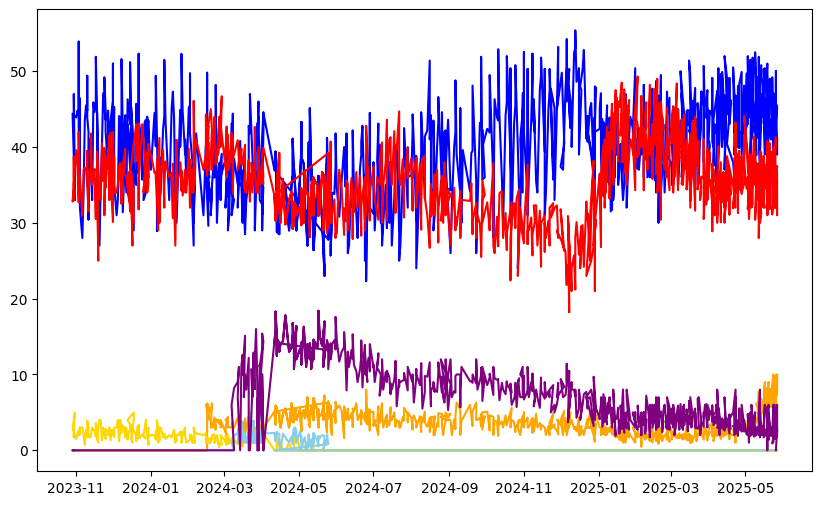

In [ ]:
# raw data 시각화 : 정당 - by - 정당
# 2) 시계열 plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df2['연월'],
        df2['정당지지율(%)_더불어민주당'],
        label='Minju', color='blue')
ax.plot(df2['연월'],
        df2['정당지지율(%)_국민의힘'],
        label='Bosu', color='red')
ax.plot(df2['연월'],
        df2['정당지지율(%)_개혁신당'],
        label='Revolut', color='orange')
ax.plot(df2['연월'],
        df2['정당지지율(%)_정의당'],
        label='Labor', color='gold')
ax.plot(df2['연월'],
        df2['정당지지율(%)_새로운미래'],
        label='New Future', color='skyblue')
ax.plot(df2['연월'],
        df2['정당지지율(%)_조국혁신당'],
        label='Choguk', color='purple')

# 3) x-축 날짜 포맷 & 회전
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right')

ax.set_xlabel('dates')
ax.set_ylabel('spt(%)')
ax.legend()
plt.tight_layout()
plt.show()

짧은 주기를 두고, 정기적으로 데이터를 뽑아내는 여론조사 의뢰 기간은 현재 한국갤럽자체조사만으로 확인되었다. 그 데이터만으로 확인하고자 함.

<ipython-input-120-42eec3286934>:31: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-120-42eec3286934>:31: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-120-42eec3286934>:31: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-120-42eec3286934>:31: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


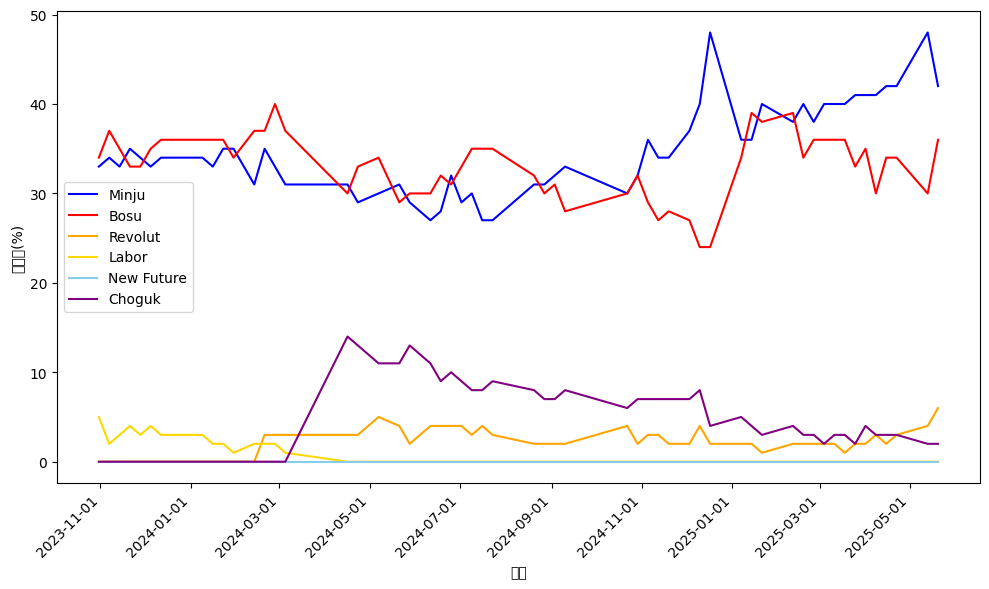

In [ ]:
# 갤럽 데이터 시각화
# 2) 시계열 plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_gallup['연월'],
        df_gallup['정당지지율(%)_더불어민주당'],
        label='Minju', color='blue')
ax.plot(df_gallup['연월'],
        df_gallup['정당지지율(%)_국민의힘'],
        label='Bosu', color='red')
ax.plot(df_gallup['연월'],
        df_gallup['정당지지율(%)_개혁신당'],
        label='Revolut', color='orange')
ax.plot(df_gallup['연월'],
        df_gallup['정당지지율(%)_정의당'],
        label='Labor', color='gold')
ax.plot(df_gallup['연월'],
        df_gallup['정당지지율(%)_새로운미래'],
        label='New Future', color='skyblue')
ax.plot(df_gallup['연월'],
        df_gallup['정당지지율(%)_조국혁신당'],
        label='Choguk', color='purple')

# 3) x-축 날짜 포맷 & 회전
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right')

ax.set_xlabel('연월')
ax.set_ylabel('지지율(%)')
ax.legend()
plt.tight_layout()
plt.show()

24.12.03계염 직후로 더불어민주당에 대한 여론 선호도는 증가하고, 국민의힘에 대한 선호도가 감소하던 것을 확인할 수 있다. 그러나 직후 국민의힘의 힘이 큰 폭으로 더불어민주당을 따라잡고, 더물어민주당에 대한 지지도가 대폭 줄어드는 것 역시 확인할 수 있었다.
이후 TV 토론의 여파 때문인지, 민주당의 기세가 한 풀 꺾이고, 개혁신당과 국민의힘 당의 기세가 조금 따라가는 것을 확인할 수 있었다.

## 데이터 신뢰도 관하여

### 여론 조사 데이터의 취약점

위의 두 데이터를 확인했을 때, 진보 제1 정당과 보수 제1 정당들의 선호도가 여론 조사 집계 데이터에 따라 확연한 차이점을 보이는 것을 확인할 수 있다.
여론조사 데이터를 수집해 차기 대권주자에 대한 인기를 확인하는 것은 그 신뢰도를 추정하는 것이 어려울 것이라고 판단된다.

즉, 정당 간 대권주자에 대한 선호도 비교를 여론조사만으로 확인하는 것이 어렵다는 것, 그리고 누가 차기 대통령이 될지 확신하는 것은 어려울 것이다.

또한
https://www.newstapa.org/article/s6JR1
위 기사를 확인해보면 알 수 있는 것은, 여론 조사라는 것이 조작될 가능성이 다분하다는 것이다.
국회의원 경선 등에 있어, 국민의 힘 당 내의 여론을 좌지우지하기 위해, 명태균이라는 인물을 통해 여론을 조작했다는 의혹이 있다.
여론조사 결과라는 것이 결국 충분히 조작될 가능성이 농후한 데이터이기 때문에, 그 신뢰도를 확신하는 것은 어렵다.

### 여론조사 데이터를 통해 확인해 볼 수 있으리라 기대하는 점

그러나 한 정당 내의 대권주자를 결정하는 것은 국회의원 경선의 경우와는 사뭇 다를 것이라 기대해볼 수 있을 것이다. 대권주자를 결정하는 것이 여론조사 결과만으로 좌지우지 된다고 보기에는 어려움이 있을 것이라 기대해 볼 수 있다. 당원들에게, 국민들에게 더욱 호소력이 짙은 인물이 보통 대권주자로서 기대해볼 만한 가치가 있기 때문에, 우리가 판단하고자 하는 깜냥이라는 것을 파악하는 데에는 여론조사 조작의 우려나 여론조사의 편파적 샘플링 경향, 혹은 샘플링 과정 중에 발생한 우연한 편파 현상 등은 무시할 수 있을 것이다.

따라서 한 정당 내의 차기 대권주자가 결정되는 방향에 있어서 여론조사의 데이터를 활용해 보는 것은, 여론을 조작하기 위한 수단이라기 보다는, 여론의 선호도를 반영한 데이터라 보는 것이 적절할 것이다.

여론의 선호도 - 사람 됨됨이, 정책실현성, 도덕성, 범죄연루 여부, 미디어 노출 등을 고려하여 차기 대권주자로서의 깜냥에 대해 파악해보도록 해보자.